This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
# 모델 정의하기
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# 벡터 합치기(무작위 벡터 784 사이즈)
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

# 영벡터랑 합치기
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 2s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

# 모델 정의
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    # 모델 컴파일
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy", # 0~1이 아니라 정수로 나오면 sparse
                  metrics=["accuracy"])
    return model

# 모델 학습 () Training model with noise channels
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

# Training model with all-zero channels
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 4ms/step - loss: 0.6136 - accuracy: 0.8102 - val_loss: 0.2753 - val_accuracy: 0.9158
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2568 - accuracy: 0.9204 - val_loss: 0.2323 - val_accuracy: 0.9287
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1722 - accuracy: 0.9475 - val_loss: 0.1630 - val_accuracy: 0.9486
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1250 - accuracy: 0.9611 - val_loss: 0.1315 - val_accuracy: 0.9609
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0904 - accuracy: 0.9718 - val_loss: 0.1506 - val_accuracy: 0.9543
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0683 - accuracy: 0.9791 - val_loss: 0.1147 - val_accuracy: 0.9668
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0505 - accuracy: 0.9841 - val_loss: 0.1257 - val_accuracy: 0.9627
Epoch 

ex 1)

From Training the same model on MNIST data with noise channels or all zero channels,


Add validation accuracy of original data for
mnist data.

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# Training model with original data
model = get_model()
history_origin = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

#
print(history_origin.history['val_accuracy'])

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2942 - accuracy: 0.9158 - val_loss: 0.1492 - val_accuracy: 0.9571
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1228 - accuracy: 0.9636 - val_loss: 0.1101 - val_accuracy: 0.9681
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0807 - accuracy: 0.9759 - val_loss: 0.0885 - val_accuracy: 0.9745
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0584 - accuracy: 0.9827 - val_loss: 0.0821 - val_accuracy: 0.9752
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0431 - accuracy: 0.9877 - val_loss: 0.0800 - val_accuracy: 0.9764
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0335 - accuracy: 0.9904 - val_loss: 0.0754 - val_accuracy: 0.9780
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0256 - accuracy: 0.9929 - val_loss: 0.0742 - val_accuracy: 0.9794
Epoch 

Plotting

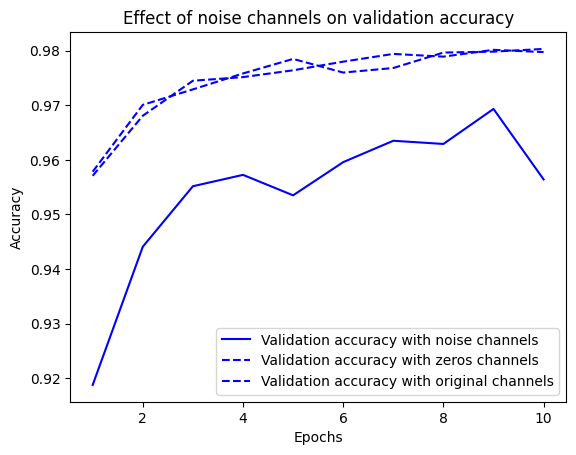

In [8]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc = history_origin.history["val_accuracy"]
epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc, "b--",
         label="Validation accuracy with original channels")

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

**Plotting a validation accuracy comparison**

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [9]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3166 - accuracy: 0.1034 - val_loss: 2.3068 - val_accuracy: 0.0993
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2997 - accuracy: 0.1157 - val_loss: 2.3113 - val_accuracy: 0.1020
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2925 - accuracy: 0.1245 - val_loss: 2.3179 - val_accuracy: 0.1022
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2806 - accuracy: 0.1377 - val_loss: 2.3218 - val_accuracy: 0.1013
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2647 - accuracy: 0.1492 - val_loss: 2.3344 - val_accuracy: 0.1065
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2476 - accuracy: 0.1623 - val_loss: 2.3455 - val_accuracy: 0.0991
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2238 - accuracy: 0.1787 - val_loss: 2.3594 - val_accuracy: 0.1017

ex 1.2)

Fitting a MNIST model with randomly shuffled labels.

Visualize training accuracy and validation accuracy.

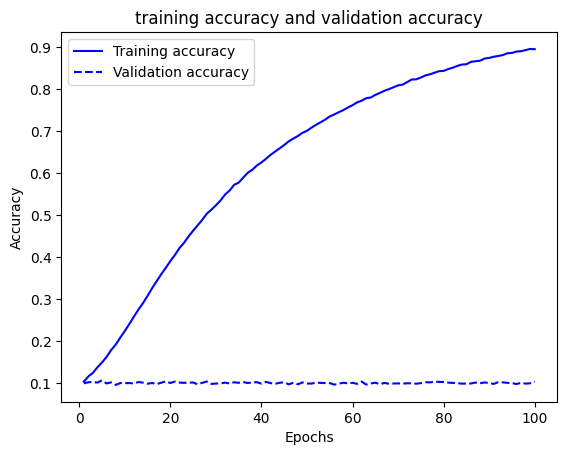

In [13]:
# Visualize training accuracy, validation accuracy

import matplotlib.pyplot as plt
train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]
epochs = range(1, 101)
plt.plot(epochs, train_acc, "b-",
         label="Training accuracy")
plt.plot(epochs, val_acc, "b--",
         label="Validation accuracy")
plt.title("training accuracy and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [14]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 414.5748 - accuracy: 0.3122 - val_loss: 3.8056 - val_accuracy: 0.2949
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 3.0712 - accuracy: 0.2431 - val_loss: 2.1282 - val_accuracy: 0.2459
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 3.5940 - accuracy: 0.2443 - val_loss: 2.2564 - val_accuracy: 0.2200
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 2.7440 - accuracy: 0.1973 - val_loss: 2.1324 - val_accuracy: 0.2234
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4401 - accuracy: 0.1893 - val_loss: 2.3428 - val_accuracy: 0.1817
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4859 - accuracy: 0.2218 - val_loss: 2.3539 - val_accuracy: 0.2234
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3129 - accuracy: 0.2089 - val_loss: 2.0774 - val_accuracy: 0.1988
Epoc

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

ex 2.1)

From Tuning key gradient descent parameters,
Modify
learning rates and check when model fails

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3593 - accuracy: 0.9120 - val_loss: 0.1329 - val_accuracy: 0.9623
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1268 - accuracy: 0.9640 - val_loss: 0.1365 - val_accuracy: 0.9653
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0922 - accuracy: 0.9747 - val_loss: 0.1475 - val_accuracy: 0.9693
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0829 - accuracy: 0.9786 - val_loss: 0.1562 - val_accuracy: 0.9702
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0665 - accuracy: 0.9827 - val_loss: 0.1749 - val_accuracy: 0.9707
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9853 - val_loss: 0.1704 - val_accuracy: 0.9726
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0510 - accuracy: 0.9875 - val_loss: 0.1996 - val_accuracy: 0.9684
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

ex 2.2)

Visualize validation loss of the original model, model with lower capacity and model
with larger capacity

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2966 - accuracy: 0.9140 - val_loss: 0.1475 - val_accuracy: 0.9582
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1229 - accuracy: 0.9639 - val_loss: 0.1243 - val_accuracy: 0.9633
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0807 - accuracy: 0.9765 - val_loss: 0.0890 - val_accuracy: 0.9743
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0579 - accuracy: 0.9825 - val_loss: 0.0814 - val_accuracy: 0.9765
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.0770 - val_accuracy: 0.9771
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0327 - accuracy: 0.9909 - val_loss: 0.0866 - val_accuracy: 0.9747
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0253 - accuracy: 0.9928 - val_loss: 0.0717 - val_accuracy: 0.9807
Epoch 

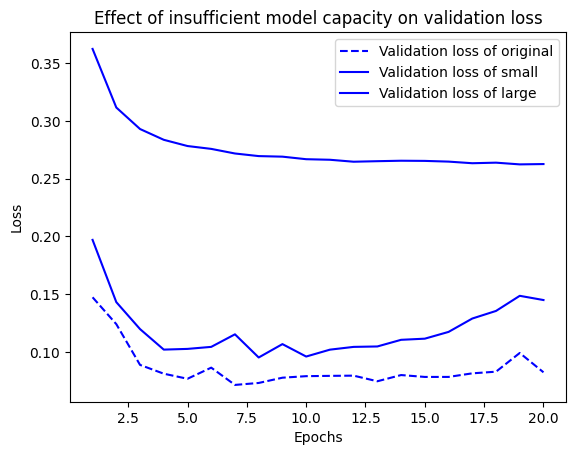

In [16]:
# original model
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_origin_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)


# small model
model = keras.Sequential([layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

# larger model
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

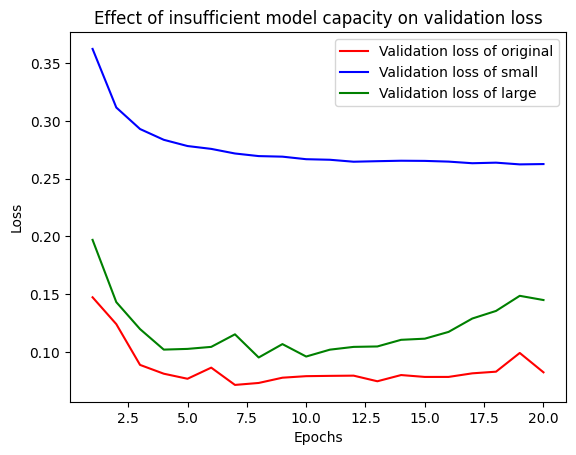

In [18]:
# Visualize
import matplotlib.pyplot as plt
val_loss = history_origin_model.history["val_loss"]
val_loss_small = history_small_model.history["val_loss"]
val_loss_large = history_large_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss, "r-", label="Validation loss of original")
plt.plot(epochs, val_loss_small, "b-", label="Validation loss of small")
plt.plot(epochs, val_loss_large, "g-", label="Validation loss of large")

plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

ex 2.3)

Visualize validation loss of the original model and model with dropout

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary